In [2]:
pip install yfinance pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.0 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 19.0 MB/s eta 0:00:00ta 0:00:01
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=698bf6e3b49f6157adb92c5ad4573a6712028c1a40ba65654decd42a737f2780
  Stored in directory: /home/codespace/.cache/pip/wheels/a6/5e/0f/8319805c4115320e0d3e8fb5799b114a2e4c4a3d6c7e523b06
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


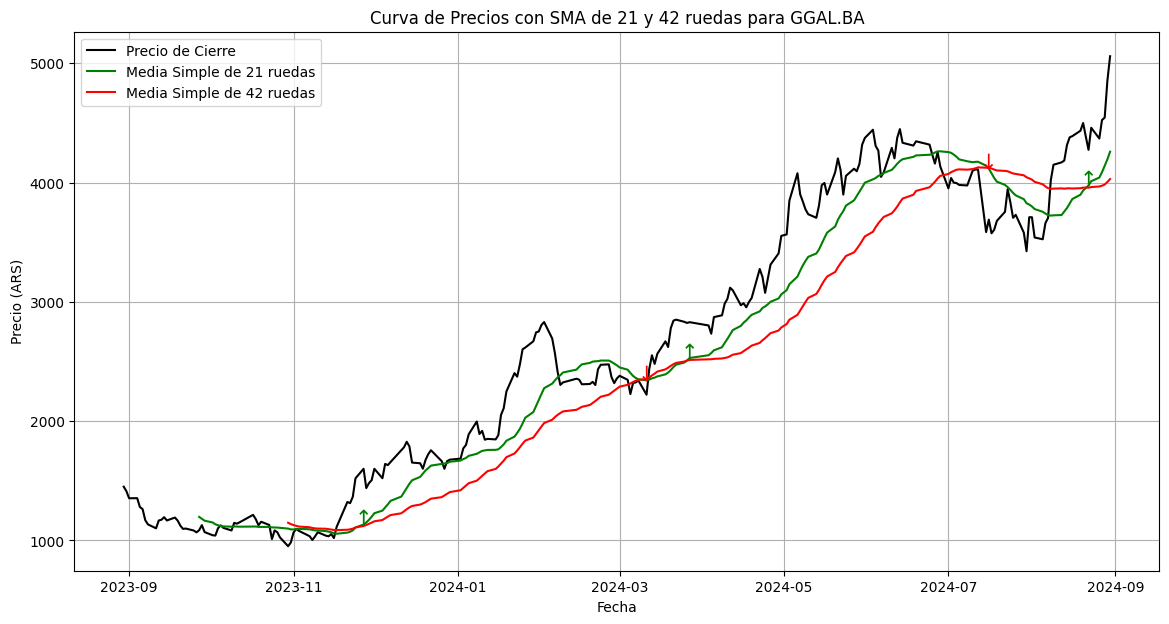

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Descargar datos de GGAL (Grupo Financiero Galicia) de los últimos 6 meses
ticker = 'GGAL.BA'
data = yf.download(ticker, period='1y')

# Calcular la media móvil simple (SMA) de 21 y 42 ruedas
data['SMA_21'] = data['Close'].rolling(window=21).mean()
data['SMA_42'] = data['Close'].rolling(window=42).mean()

# Configurar el tamaño de la figura y el color de fondo
plt.figure(figsize=(14, 7))


# Graficar la curva de precios, la SMA de 21 ruedas y la SMA de 42 ruedas
plt.plot(data['Close'], label='Precio de Cierre', color='black')
plt.plot(data['SMA_21'], label='Media Simple de 21 ruedas', color='green')
plt.plot(data['SMA_42'], label='Media Simple de 42 ruedas', color='red')

# Detectar cruces y agregar flechas
for i in range(1, len(data)):
    if data['SMA_21'].iloc[i] > data['SMA_42'].iloc[i] and data['SMA_21'].iloc[i-1] <= data['SMA_42'].iloc[i-1]:
        plt.annotate('↑', (data.index[i], data['SMA_21'].iloc[i]), color='green', fontsize=15, ha='center')
    elif data['SMA_21'].iloc[i] < data['SMA_42'].iloc[i] and data['SMA_21'].iloc[i-1] >= data['SMA_42'].iloc[i-1]:
        plt.annotate('↓', (data.index[i], data['SMA_21'].iloc[i]), color='red', fontsize=15, ha='center')

# Añadir título y etiquetas
plt.title(f'Curva de Precios con SMA de 21 y 42 ruedas para {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Precio (ARS)')

# Mostrar la leyenda
plt.legend()

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()